## Evaluate speed of get_planet_barycentric() and accuracy of get_planet_chandra()

This is for comparison with `pr162_spk_performance_branch.ipynb` and used for
functional testing of [PR-162](https://github.com/sot/chandra_aca/pull/162).

This was run using (effectively) ska3-flight 2023.9rc1 and the release 4.44.0 of
`chandra_aca`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from agasc import sphere_dist
from cxotime import CxoTime

import chandra_aca
from chandra_aca.planets import (
    get_planet_barycentric,
    get_planet_chandra,
    get_planet_chandra_horizons,
)
from chandra_aca.transform import eci_to_radec

In [2]:
print(chandra_aca.__version__)

4.44.0


In [3]:
venus = get_planet_chandra_horizons("venus", "2021:001", "2023:001", 1000)

In [4]:
def plot_planet_offsets(t_offset=0):
    times = CxoTime(venus["time"]).secs + t_offset
    venus_spk = get_planet_chandra("venus", time=times)
    ra, dec = eci_to_radec(venus_spk)
    venus["offset"] = sphere_dist(ra, dec, venus["ra"], venus["dec"]) * 3600
    venus["offset"].format = "%.2f"
    print(t_offset, venus["offset"].mean(), np.median(venus["offset"]))
    plt.hist(venus["offset"], bins=100, log=True)
    plt.title("Error in Venus position get_planet_chandra() vs. JPL Horizons (arcsec)")
    plt.grid("on")
    plt.xlabel("Error (arcsec)")

0 3.1682812551277184 3.4874826322898254


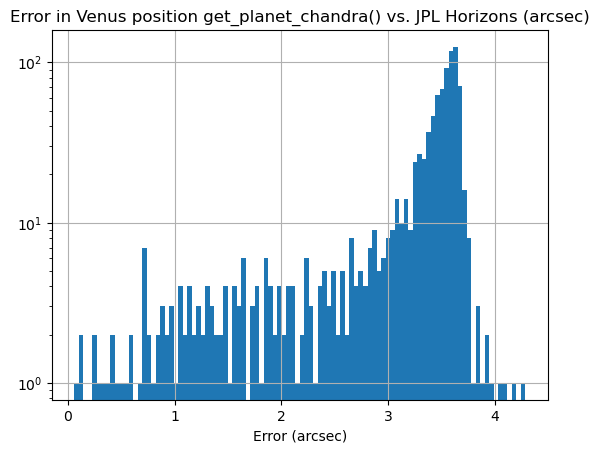

In [5]:
plot_planet_offsets()

In [6]:
t0 = CxoTime("2020:001:00:00:00.000").secs
t0_float = float(t0)

In [7]:
t0_np = np.array([t0])
t0_np_scalar = np.array(t0)

In [8]:
get_planet_barycentric("earth", t0_float)

array([-2.54532372e+07,  1.34037272e+08,  5.81092978e+07])

In [9]:
get_planet_barycentric("earth", t0_np_scalar)

array([-2.54532372e+07,  1.34037272e+08,  5.81092978e+07])

In [10]:
get_planet_barycentric("earth", t0_np)

array([[-2.54532372e+07,  1.34037272e+08,  5.81092978e+07]])

In [11]:
%timeit get_planet_barycentric("earth", t0)

129 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%timeit get_planet_barycentric("earth", t0_float)

130 µs ± 471 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
%timeit get_planet_barycentric("earth", t0_np)

154 µs ± 2.86 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [14]:
%timeit get_planet_barycentric("earth", t0_np_scalar)

135 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
